In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
features = pd.read_csv("../data/raw/features.csv")
sample_submission = pd.read_csv ("../data/raw/sampleSubmission.csv")

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
print ("Train Data Shape:",train.shape)
print ("Test Data Shape:",test.shape)
print ("Features Data Shape:",features.shape)
print ("Sample_submission Data Shape:",sample_submission.shape)

print ("\ntrain info():")
train.info()

Train Data Shape: (421570, 5)
Test Data Shape: (115064, 4)
Features Data Shape: (8190, 12)
Sample_submission Data Shape: (115064, 2)

train info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
print(features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [11]:
print("Missing values in train:\n", train.isnull().sum())

print("Missing values in features:\n", features.isnull().sum())

print("Missing values in Sample Submmission:",sample_submission.isnull().sum())

print ("Missing values in Test:",test.isnull().sum())


Missing values in train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Missing values in features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Missing values in Sample Submmission: Id              0
Weekly_Sales    0
dtype: int64
Missing values in Test: Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


In [12]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


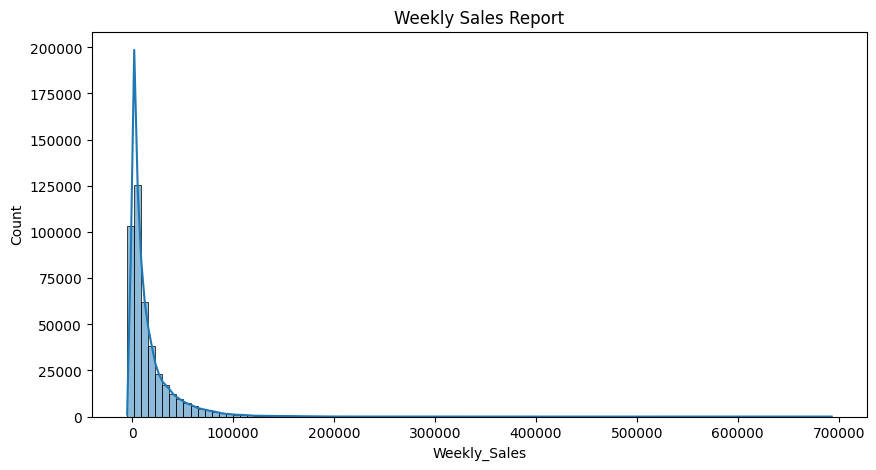

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(train["Weekly_Sales"],bins=100, kde=True)
plt.title("Weekly Sales Report")
plt.show()

In [14]:
duplicate_rows= train.duplicated().sum()
print (f"DuplicatedRows Train: {duplicate_rows}")
print ("duplicate:",duplicate_rows)
print (train.columns)


UniqueKeys = train[['Store','Dept','Date']].drop_duplicates().shape[0]
TotalRows = train.shape[0]
print(f"Total Rows: {TotalRows}")
print("Number of unique keys:",UniqueKeys)

if UniqueKeys ==TotalRows:
    print ("✅ ok All Unique")
else:
    print("Duplicate in Key")

DuplicatedRows Train: 0
duplicate: 0
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Total Rows: 421570
Number of unique keys: 421570
✅ ok All Unique


In [27]:
# تبدیل ستون Date به datetime
train['Date']= pd.to_datetime(train['Date'])

# استخراج ویژگی‌های زمانی

train['Year'] = train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']= train['Date'].dt.isocalendar().week
train['Day'] = train['Date'].dt.day
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['IsWeekend']= train['DayOfWeek'].isin([5,6])
train['IsWeekend2']= (train['DayOfWeek'] >=5).astype(int)

# فصل (1: زمستان، 2: بهار، 3: تابستان، 4: پاییز)
train['Season']=train['Date'].dt.month % 12 //3 + 1

# روز سال
train['DayOfYear']=train['Date'].dt.dayofyear

# مثال: ماه + روز هفته
train['Month_DayOfWeek']= train['Month'].astype(str) + '_' + train['DayOfWeek'].astype(str)

# مثال: سال + ماه
train ['Month_Year'] = train['Month'].astype(str) + '_' + train['Year'].astype(str)

# مثال: سال + روز
train ['Day_Year'] = train['Day'].astype(str) + '_' + train['Year'].astype(str)

#sin/Cos
train['Month_sin']=np.sin(2*np.pi *train['Month']/12)
train['Month_Cons'] = np.cos(2 * np.pi * train ['Month']/12)
train['DayOfWeek_sin']= np.sin(2*np.pi *train['DayOfWeek']/12)
train['DayOfWeek_Cons'] = np.cos(2 * np.pi * train ['DayOfWeek']/12)

# نمایش چند ردیف برای بررسی
print(train.head())



   Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50      False  2010      2     5    5   
1      1     1 2010-02-12      46039.49       True  2010      2     6   12   
2      1     1 2010-02-19      41595.55      False  2010      2     7   19   
3      1     1 2010-02-26      19403.54      False  2010      2     8   26   
4      1     1 2010-03-05      21827.90      False  2010      3     9    5   

   DayOfWeek  IsWeekend  Season  DayOfYear Month_DayOfWeek Day_Month  \
0          4      False       1         36             2_4    5_2010   
1          4      False       1         43             2_4   12_2010   
2          4      False       1         50             2_4   19_2010   
3          4      False       1         57             2_4   26_2010   
4          4      False       2         64             3_4    5_2010   

   IsWeekend2 Month_Year Day_Year  Month_sin    Month_Cons  DayOfWeek_sin  \
0           0     2_2

In [30]:
# آمار کلی ستون‌ها
print(train.describe())

# تعداد مقادیر یکتا در هر ستون
print(train.nunique())



               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Year          Month       Week            Day  \
count  421570.000000  421570.000000  421570.000000   421570.0  421570.000000   
mean    15981.258123    2010.968591       6.449510  25.826762      15.673131   
min     -4988.940000    2010.000000       1.000000        1.0       1.000000   
25%      2079.650000    2010.000000       4.00000

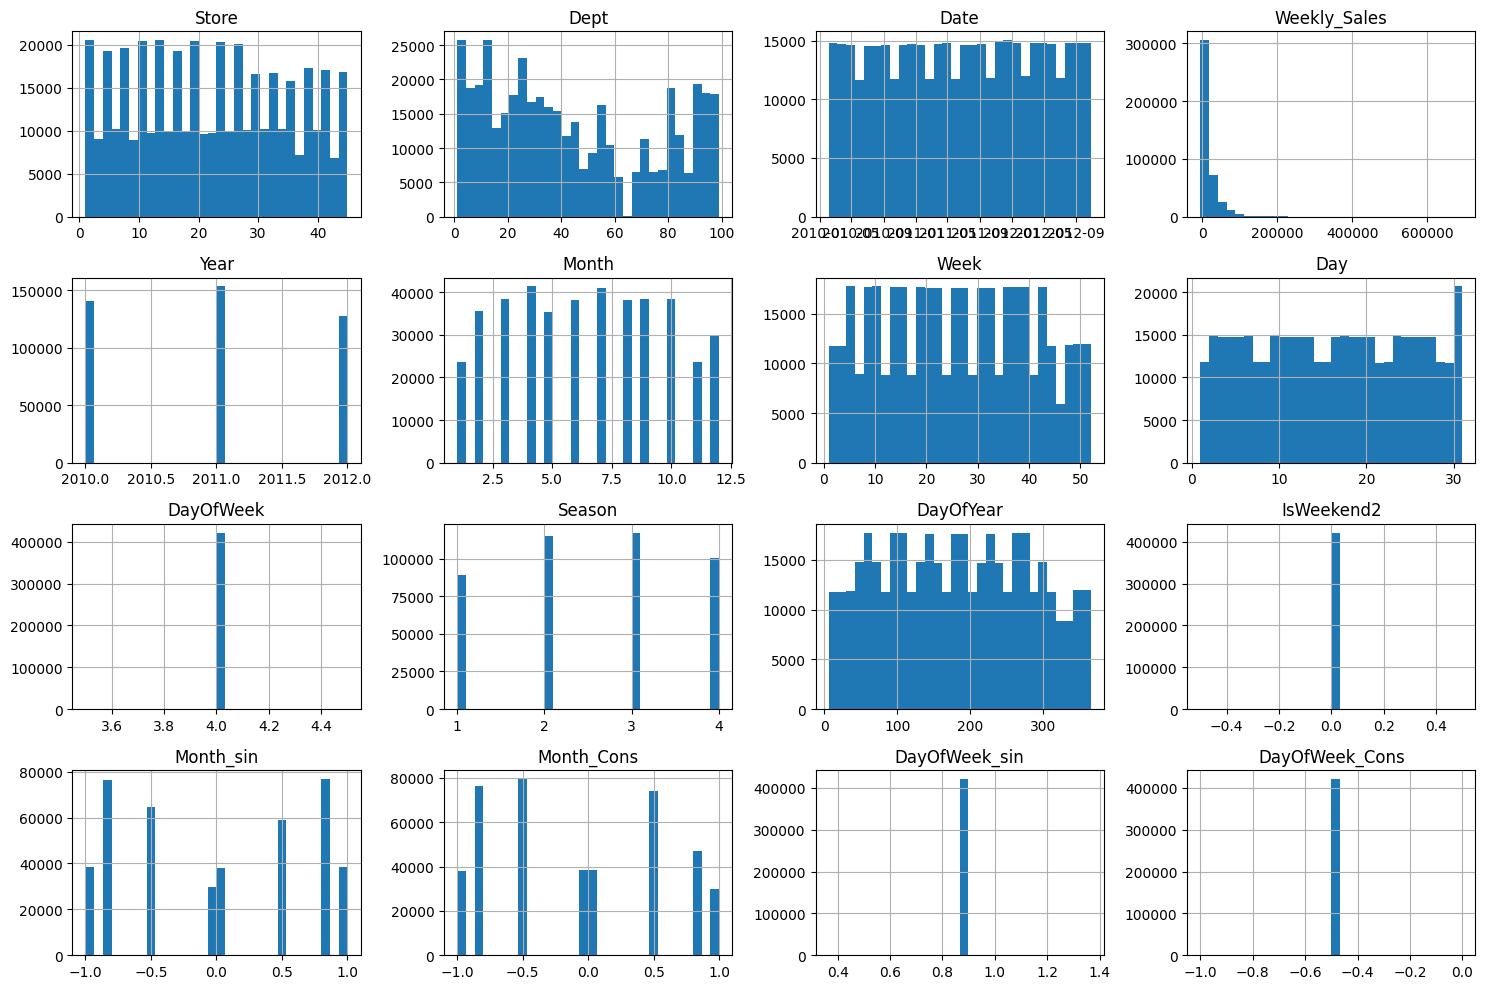

In [31]:
# ترسیم هیستوگرام ویژگی‌های عددی
train.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

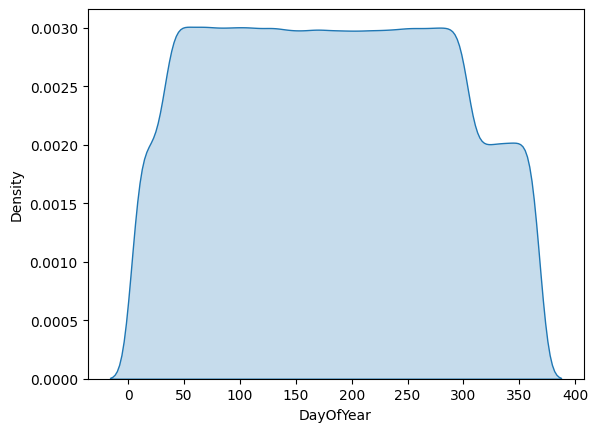

In [36]:
# ترسیم توزیع یک ستون خاص (مثلاً DayOfYear)
import seaborn as sns
sns.kdeplot(train['DayOfYear'], fill=True)
plt.show()